##### Libraries
First we’re importing all the libraries we’ll be using. Not many, really... Numpy, gym, random, time, and clear_output from Ipython’s display.

In [1]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output
from matplotlib import pyplot as plt

c:\users\smrut\appdata\local\programs\python\python37\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
c:\users\smrut\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
c:\users\smrut\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


##### Creating the environment
Next, to create our environment, we just call gym.make() and pass a string of the name of the environment we want to set up. We'll be using the environment FrozenLake-v0. All the environments with their corresponding names you can use here are available on [Gym’s website](https://gym.openai.com/envs/#classic_control).

In [2]:
env = gym.make("FrozenLake-v0")

##### Creating the Q-table
We’re now going to construct our Q-table, and initialize all the Q-values to zero for each state-action pair.

Remember, the number of rows in the table is equivalent to the size of the state space in the environment, and the number of columns is equivalent to the size of the action space. We can get this information using using env.observation_space.n and env.action_space.n, as shown below. We can then use this information to build the Q-table and fill it with zeros.

In [3]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))

If you're foggy about Q-tables at all, be sure to check out the earlier post where we covered all the details you need for Q-tables.

Alright, here’s our Q-table!

In [4]:
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


##### Initializing Q-learning parameters
Now, we’re going to create and initialize all the parameters needed to implement the Q-learning algorithm.

In [5]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

Let's step through each of these.

First, with num_episodes, we define the total number of episodes we want the agent to play during training. Then, with max_steps_per_episode, we define a maximum number of steps that our agent is allowed to take within a single episode. So, if by the one-hundredth step, the agent hasn’t reached the frisbee or fallen through a hole, then the episode will terminate with the agent receiving zero points.

Next, we set our learning_rate, which was mathematically shown using the symbol 
α
 in the previous post. Then, we also set our discount_rate, as well, which was represented with the symbol 
γ
 previously.
 
 Now, the last four parameters are all for related to the exploration-exploitation trade-off we talked about last time in regards to the epsilon-greedy policy. We’re initializing our exploration_rate to 1 and setting the max_exploration_rate to 1 and a min_exploration_rate to 0.01. The max and min are just bounds to how large or small our exploration rate can be. Remember, the exploration rate was represented with the symbol 
ϵ
 when we discussed it previously.

Lastly, we set the exploration_decay_rate to 0.01 to determine the rate at which the exploration_rate will decay.

##### Coding the Q-learning algorithm training loop
Let’s start from the top.

First, we create this list to hold all of the rewards we’ll get from each episode. This will be so we can see how our game score changes over time. We’ll discuss this more in a bit

In [6]:
rewards_all_episodes = []

In the following block of code, we’ll implement the entire Q-learning algorithm we discussed in detail in a couple posts back. When this code is executed, this is exactly where the training will take place. This first for-loop contains everything that happens within a single episode. This second nested loop contains everything that happens for a single time-step.

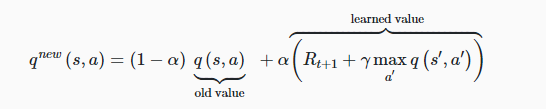

********Average reward per thousand episodes********

1000 :  0.04300000000000003
2000 :  0.20500000000000015
3000 :  0.4270000000000003
4000 :  0.5500000000000004
5000 :  0.6280000000000004
6000 :  0.6670000000000005
7000 :  0.6440000000000005
8000 :  0.7080000000000005
9000 :  0.6640000000000005
10000 :  0.6600000000000005


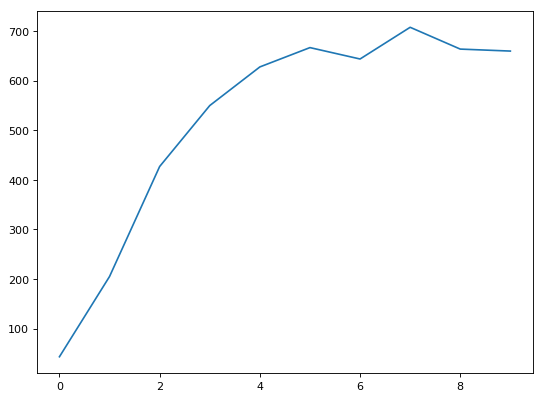

In [7]:
# Q-learning algorithm
for episode in range(num_episodes):
    # initialize new episode params
    state = env.reset()
    done = False
    rewards_current_episode = 0
    for step in range(max_steps_per_episode):
        # Exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
        # Take new action
        new_state, reward, done, info = env.step(action)
        # Update Q-table
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
        learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        # Set new state
        state = new_state
        # Add new reward
        rewards_current_episode += reward
        if done == True: 
            break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
    (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
    # Add current episode reward to total rewards list
    rewards_all_episodes.append(rewards_current_episode)

# Calculate and print the average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thosand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

# Ploting average reward per 1000 episode 
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.array(rewards_per_thosand_episodes).sum(axis=1))
plt.show()

In [8]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[0.53445684 0.50932452 0.49354084 0.49468537]
 [0.30157155 0.39401543 0.35574125 0.48450074]
 [0.40022868 0.40527621 0.39680917 0.4589724 ]
 [0.24182733 0.27070355 0.28392103 0.43804772]
 [0.56460406 0.38930369 0.39637413 0.37814181]
 [0.         0.         0.         0.        ]
 [0.31005015 0.09312383 0.19367946 0.14442238]
 [0.         0.         0.         0.        ]
 [0.36849084 0.37807794 0.4798651  0.60772966]
 [0.42554492 0.64966861 0.44839069 0.4525701 ]
 [0.64708611 0.41459727 0.3454047  0.34703367]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.51328498 0.42578811 0.73764955 0.47889778]
 [0.76657462 0.88729114 0.77208732 0.73829225]
 [0.         0.         0.         0.        ]]


##### The code to watch the agent play the game
This block of code is going to allow us to watch our trained agent play Frozen Lake using the knowledge it’s gained from the training we completed.

In [9]:
# Watch our agent play Frozen Lake by playing the best action 
# from each state according to the Q-table

for episode in range(3):
    # initialize new episode params
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)
    for step in range(max_steps_per_episode):
        # Show current state of environment on screen
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        # Choose action with highest Q-value for current state
        action = np.argmax(q_table[state,:])
        # Take new action
        new_state, reward, done, info = env.step(action)
        
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                # Agent reached the goal and won episode
                print("****You reached the goal!****")
                time.sleep(3)    
            else:
                # Agent stepped in a hole and lost episode
                print("****You fell through a hole!****")
                time.sleep(3)
                clear_output(wait=True)
            break
            
        # Set new state
        state = new_state
        
env.close()

  (Left)
SFFF
FHFH
FFFH
HFFG
****You fell through a hole!****
